In [1]:
print('hello world')

hello world


In [2]:
import azure.core
import azureml.core
from azureml.core import Workspace, Dataset

subscription_id = '2ff60c86-4824-4a6a-bb33-beb7c5b60b23'
resource_group = 'machinelearning'
workspace_name = 'akashbws'

workspace = Workspace(subscription_id, resource_group, workspace_name)

dataset = Dataset.get_by_name(workspace, name='salary_classification')
df = dataset.to_pandas_dataframe()

C:\Users\91706\AppData\Roaming\Python\Python37\site-packages\paramiko\transport.py:236: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [4]:
import pandas as pd
df.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [4]:
df.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [5]:
new_X = df.drop(['salary'], axis=1)
new_y = df['salary']

In [6]:
new_X.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States


In [7]:
new_y.head(3)

0     <=50K
1     <=50K
2     <=50K
Name: salary, dtype: object

In [9]:
import pandas as pd
updated = pd.concat([new_X, new_y], axis=1)

In [11]:
cat_columns = ['workclass','education','marital-status', 'occupation', 'relationship','race', 'sex','country','salary']
cat_summary_stats = df[cat_columns].describe().to_dict()
for col in cat_summary_stats:
    keys = list(cat_summary_stats[col].keys())
    values = list(cat_summary_stats[col].values())
    for index in range(len(keys)):
        ##run.log_row(col, stat=keys[index], value = values[index])
        print(col, keys[index], values[index])

workclass count 32561
workclass unique 9
workclass top  Private
workclass freq 22696
education count 32561
education unique 16
education top  HS-grad
education freq 10501
marital-status count 32561
marital-status unique 7
marital-status top  Married-civ-spouse
marital-status freq 14976
occupation count 32561
occupation unique 15
occupation top  Prof-specialty
occupation freq 4140
relationship count 32561
relationship unique 6
relationship top  Husband
relationship freq 13193
race count 32561
race unique 5
race top  White
race freq 27816
sex count 32561
sex unique 2
sex top  Male
sex freq 21790
country count 32561
country unique 42
country top  United-States
country freq 29170
salary count 32561
salary unique 2
salary top  <=50K
salary freq 24720


In [12]:
import seaborn as sns

In [13]:
import azureml.core
from azureml.core import Workspace, Dataset, Run
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib_inline

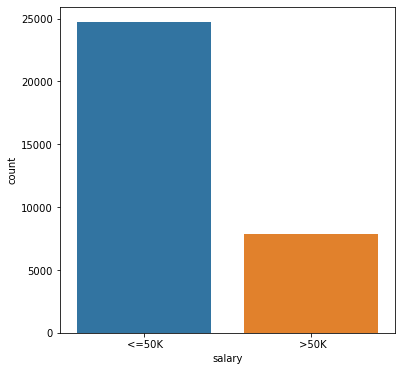

In [14]:
fig = plt.figure(figsize=(6,6))
sns.countplot(x = 'salary',data = df)
plt.show()

##run.log_image(name='label distribution', plot=fig)